In [1]:
# Importing necessary libraries and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv('vehicles_us.csv')
df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

Data Cleaning

In [2]:
# Seperate model from make
df[['make', 'model']] = df['model'].str.split(' ', n=1, expand=True)
df.head()

price  model_year   model  condition  cylinders fuel  odometer  \
0   9400      2011.0      x5       good        6.0  gas  145000.0   
1  25500         NaN   f-150       good        6.0  gas   88705.0   
2   5500      2013.0  sonata   like new        4.0  gas  110000.0   
3   1500      2003.0   f-150       fair        8.0  gas       NaN   
4  14900      2017.0     200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed      make  
0    automatic     SUV         NaN     1.0  2018-06-23           19       bmw  
1    automatic  pickup       white     1.0  2018-10-19           50      ford  
2    automatic   sedan         red     NaN  2019-02-07           79   hyundai  
3    automatic  pickup         NaN     NaN  2019-03-22            9      ford  
4    automatic   sedan       black     NaN  2019-04-02           28  chrysler

In [3]:
# Find missing values in the data
missing_values = df.isnull().sum()
print(missing_values)

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
make                0
dtype: int64


Dealing with missing values

In [4]:
# Find data types for missing values
#print(df.dtypes)
print(df['cylinders'].unique())

[ 6.  4.  8. nan  5. 10.  3. 12.]


In [5]:
# Replace the quantitative columns missing data with the mean of the column
df['model_year'].fillna(df['model_year'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].mean(), inplace=True)
print(df.isnull().sum())

price               0
model_year          0
model               0
condition           0
cylinders        5260
fuel                0
odometer            0
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
make                0
dtype: int64


In [6]:
# Replace the categorical columns missing data with the most frequent value (mode)
df['cylinders'].fillna(df['cylinders'].mode()[0], inplace=True)
df['paint_color'].fillna(df['paint_color'].mode()[0], inplace=True)

In [7]:
# Change the mising is_4wd to be False
df['is_4wd'].fillna(0.0, inplace=True)
print(df.isnull().sum())

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
make            0
dtype: int64


In [8]:
# Check for duplicates

dups = df[df.duplicated(keep=False)]
display(dups)

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed, make]
Index: []

In [9]:
# Remove duplicates

# No duplicates in the list

Descriptive Statistics

In [10]:
# Summary statistics
df.describe()

price    model_year     cylinders       odometer        is_4wd  \
count   51525.000000  51525.000000  51525.000000   51525.000000  51525.000000   
mean    12132.464920   2009.838234      6.316623  115553.461738      0.496303   
std     10040.803015      6.065836      1.672586   59902.205520      0.499991   
min         1.000000   1908.000000      3.000000       0.000000      0.000000   
25%      5000.000000   2007.000000      4.000000   79181.000000      0.000000   
50%      9000.000000   2011.000000      6.000000  115553.461738      0.000000   
75%     16839.000000   2014.000000      8.000000  146541.000000      1.000000   
max    375000.000000   2019.000000     12.000000  990000.000000      1.000000   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

In [11]:
# Count the categorical columns
 #condition
print(df['condition'].value_counts())
 #paint
print(df['paint_color'].value_counts())
 #model
print(df['model'].value_counts())
 #make
print(df['make'].value_counts())
 #type
print(df['type'].value_counts())
 #fuel
print(df['fuel'].value_counts())

condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: count, dtype: int64
paint_color
white     19296
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64
model
f-150                  2796
silverado 1500         2171
1500                   1750
silverado              1271
wrangler               1119
                       ... 
f-250 super duty        241
tl                      236
sorento                 236
murano                  235
benze sprinter 2500      41
Name: count, Length: 100, dtype: int64
make
ford             12672
chevrolet        10611
toyota            5445
honda             3485
ram               3316
jeep              3281
nissan            3208
gmc               2378
subaru            1272
dodge             1255
hyundai           1173
volkswage

Visualizations

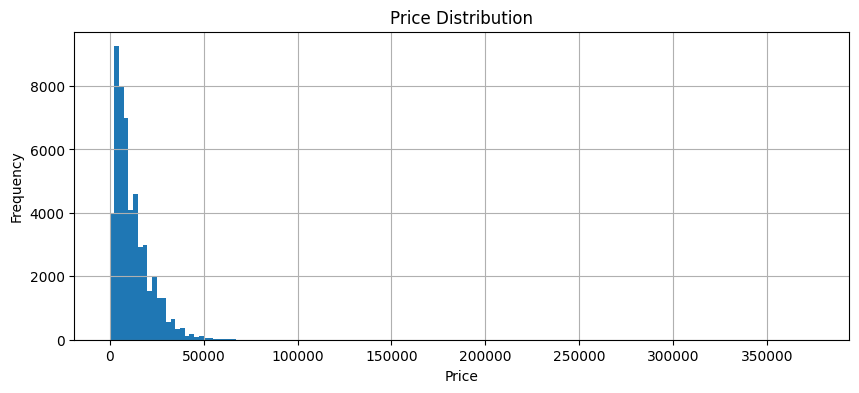

In [12]:
# Plot histograms of price
plt.figure(figsize=(10,4))
df['price'].hist(bins=150)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

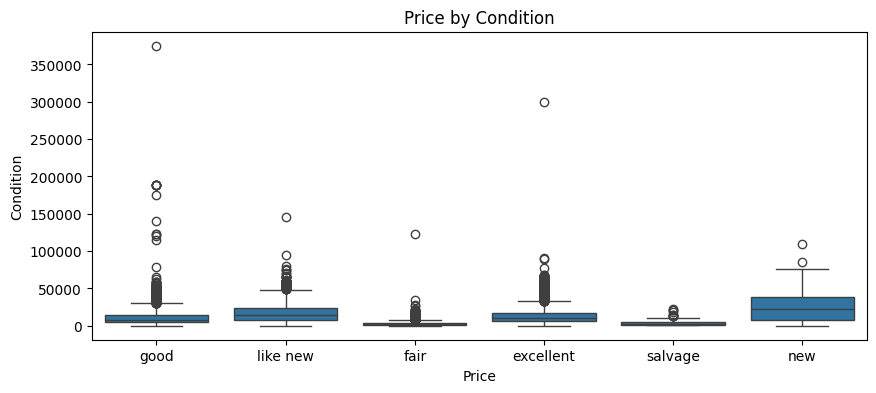

In [13]:
# Make box plot for price by condition
plt.figure(figsize=(10,4))
sns.boxplot(x='condition', y='price', data=df)
plt.title('Price by Condition')
plt.xlabel('Price')
plt.ylabel('Condition')
plt.show()

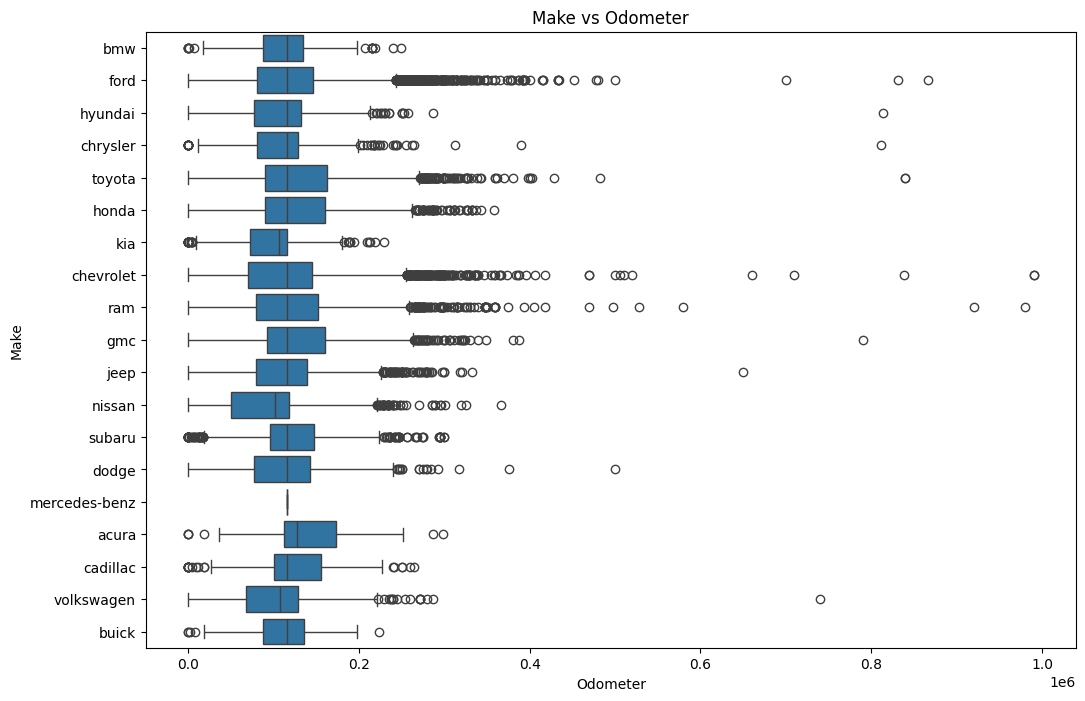

In [14]:
# Make boxplot of make and odometer relationship
plt.figure(figsize=(12,8))
sns.boxplot(y="make", x="odometer", data=df)
plt.title('Make vs Odometer')
plt.ylabel('Make')
plt.xlabel('Odometer')
plt.show()

Plotly Express Visualizations

In [19]:
# Histogram of odometer
odometer_hist = px.histogram(df, x='odometer', nbins=50)
odometer_hist.show()

In [21]:
 # Scatterplot of  mileage by year
odometer_year = px.scatter(df, x='odometer', y='model_year', color='make')
odometer_year.show()

In [27]:
# Scatterplot of price by year
price_year = px.scatter(df, x="model_year", y="price", color="make", hover_name="model")
price_year.show()